# EDA - Exploratory Data Analysis.


# Dicionário
Ethereum: blockchain.

Ether: cripto moeda utilizada no Ethereum.

Contrato inteligente: um programa escrito com a linguagem interna do Ethereum responsável por definir especificações complexas de uma trasação e automatizá-la.

Transações internas: transações feitas por meio de contratos inteligentes.

Transações normais: transações feitas de endereço de conta para outro endereço, sem o intermédio de um contrato inteligente, e que dependem se comandos feitos pelo próprio usuário.

Token: um ativo digital criado que pode representar várias coisas, como dinheiro digital, ações de uma empresa, pontos de recompensa, NFTs (tokens não fungíveis), entre outros.

ERC-20: tipo de token usado para criptomoedas e ativos que têm unidades intercambiáveis.

Address: endereço de conta Ethereum.  

FLAG: define se uma conta Ethereum se envolve em transações fraudulentas (1), ou não (0).

Dif_tempo_entre_primeira_ultima_trans: diferença de tempo entre a primeira e a última transação. 

Saldo_total_pos_trans_enviadas: saldo total de uma conta após transações realizadas.

Tempo_med_entre_trans_enviadas: tempo médio (minutos) entre transações enviadas.

Total_trans_normais_enviadas: Nº total de transações normais enviadas.

Total_ether_enviado: quantidade total de ether enviado.

Val_max_recebido: valor máximo de ether recebido.

Val_med_recebido: valor médio de ether recebido.

Total_ether_recebido: quantia total de ether recebido.

N_trans_token_recebidas_end_exc: Nº de transações de tokens um endereço recebeu de endereços únicos.

N_trans_token_recebidas_end_contrato_exc: Nº de transações um endereço recebeu de contratos inteligentes únicos que emitem ou transferem tokens.

N_tokens_exc_recebidos: Nº de tokens exclusivos recebidos por meio de transações que emitem ou transferem tokens.

N_trans_token_ERC20: Nº total de transações de transferência de tokens ERC20.

Val_med_recebido_trans_token_ERC20: valor médio em ether recebido em transferência de tokens ERC20.

Total_ether_recebido_trans_token_ERC20_: total de ether recebido em transferência de tokens ERC20.

Val_min_recebido_trans_token_ERC20: valor mínimo de ether recebido em transferência de tokens ERC20.

Val_max_recebido_trans_token_ERC20: valor máximo em ether recebido em transferência de tokens ERC20.

In [36]:
import scipy.stats as stats
from scipy.stats import ks_2samp
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
con = sqlite3.connect("projetorisco.db") # Cria um banco de dados SQLite.

In [3]:
cur = con.cursor() # Armazena o cursor.

In [4]:
pd.set_option('display.max_columns', None) # Estabelece que todas as colunas do DataFrame apareçam.

In [5]:
df_geral = pd.read_sql_query("""
    SELECT *
    FROM transaction_dataset
""", con) # Cria um novo DataFrame e salva nele o resultado da consulta em SQL.

df_geral.head()

,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,min_value_sent_to_contract,max_val_sent_to_contract,avg_value_sent_to_contract,total_transactions_(including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_sent_contracts,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_sent_addr.1,ERC20_uniq_rec_contract_addr,ERC20_avg_time_between_sent_tnx,ERC20_avg_time_between_rec_tnx,ERC20_avg_time_between_rec_2_tnx,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [6]:
df_geral = df_geral.drop_duplicates() # Exclui as duplicadas.

In [7]:
df_geral.info() # Traz o formato dos dados.

<class 'pandas.core.frame.DataFrame'>
Index: 9823 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9823 non-null   object 
 1   FLAG                                                  9823 non-null   int64  
 2   Avg_min_between_sent_tnx                              9823 non-null   float64
 3   Avg_min_between_received_tnx                          9823 non-null   float64
 4   Time_Diff_between_first_and_last_(Mins)               9823 non-null   float64
 5   Sent_tnx                                              9823 non-null   int64  
 6   Received_Tnx                                          9823 non-null   int64  
 7   Number_of_Created_Contracts                           9823 non-null   int64  
 8   Unique_Received_From_Addresses                        9823 non-

In [8]:
# Converte a coluna 'FLAG' de int64 para object. Isso é feito porque, mesmo que seja representada por números, esta
# variável é categórica e, quando retornada do Bando de Dados, volta com o formato incorreto.
df_geral[['FLAG']] = df_geral[['FLAG']].astype(object)

In [9]:
# Seleciona as colunas numéricas, pois, mais a frente, será aplicado o teste KS, que só aceita variáveis numéricas.
df_geral_num = df_geral.select_dtypes(include = ['number'])

# Inclui as colunas 'Address' e 'FLAG' (do tipo object).
df_geral_num = df_geral[['Address', 'FLAG']].join(df_geral_num)

# Exibe as primeiras linhas do DataFrame resultante.
df_geral_num.head()

,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,min_value_sent_to_contract,max_val_sent_to_contract,avg_value_sent_to_contract,total_transactions_(including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_sent_contracts,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_sent_addr.1,ERC20_uniq_rec_contract_addr,ERC20_avg_time_between_sent_tnx,ERC20_avg_time_between_rec_tnx,ERC20_avg_time_between_rec_2_tnx,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0


# Variável que mais discrimina endereços fraudulentos.

In [10]:
def ks_test_columns(df: pd.DataFrame, flag_col: str = "FLAG", alpha: float = 0.01):
    """
    Aplica o teste KS entre as distribuições das colunas numéricas do DataFrame divididas pelo FLAG.
    Retorna um DataFrame ordenado com as colunas onde o p-valor do teste é menor que alpha.
    
    :param df: DataFrame do pandas contendo os dados
    :param flag_col: Nome da coluna usada para separar os dados
    :param alpha: Nível de significância para o teste KS (default = 0.01)
    :return: DataFrame com colunas numéricas e respectivos p-valores, ordenado em ordem decrescente do p-valor
    """
    # Separa o dataset em dois subconjuntos.
    df_1 = df[df[flag_col] == 1]
    df_0 = df[df[flag_col] == 0]
    
    # Seleciona apenas colunas numéricas.
    num_cols = df.select_dtypes(include = ['number']).columns
    
    # Lista para armazenar os resultados.
    results = []
    
    # Itera sobre as colunas numéricas (exceto 'FLAG').
    for col in num_cols:
        # Remove valores NaN antes de aplicar o teste.
        data_1 = df_1[col].dropna()
        data_0 = df_0[col].dropna()
        
        # Verifica se há dados suficientes para o teste.
        if len(data_1) > 1 and len(data_0) > 1:
            stat, p_value = ks_2samp(data_1, data_0)
            if p_value < alpha:
                results.append((col, p_value))
    
    # Cria o DataFrame com os resultados e ordenar pelo p-valor de forma decrescente.
    results_df = pd.DataFrame(results, columns = ["Column", "P-Value"]).sort_values(by = "P-Value", ascending = False)
    
    return results_df

In [11]:
lista = ks_test_columns(df_geral_num, "FLAG", 0.01) # Aplica a função.

lista = lista.sort_values(by = "P-Value", ascending = False).reset_index(drop = True) # Reordena o índice do DataFrame em ordem
                                                                                      # decrescente.

In [12]:
lista.head(31) # Apresenta o DataFrame.

,Column,P-Value
0,ERC20_min_val_rec,5.485511e-03
1,ERC20_total_Ether_received,2.058051e-03
2,max_value_received,2.932853e-04
3,ERC20_avg_val_rec,2.802652e-04
4,Total_ERC20_tnxs,1.945511e-04
5,ERC20_avg_val_sent,1.446393e-04
6,total_Ether_sent,1.353011e-04
7,ERC20_max_val_sent,1.017331e-04
8,ERC20_uniq_sent_token_name,9.255358e-05
9,ERC20_total_ether_sent,6.023666e-05


Após aplicar o teste KS (Kolmogorov-Smirnov) às variáveis acima e obter a relação, em ordem decrescente, de seus respectos valores de P-Value, contata-se que a que mais contribui para a identificação de fraudes é a variável ERC20_max_val_rec **(valor máximo em ether recebido em transferência de tokens ERC20)**, já que seu P-value é o mais baixo. Essa costatação indica que, em outras palavras, os valores englobados pela variável são os que mais contribuem na definição de se um endereço Ethereum está envolvido em fraude ou não. 

# Alteração da nomenclatura em inglês.

In [13]:
# Seleciona apenas algumas colunas.
colunas_selecionadas = ['Address', 'FLAG', 'Time_Diff_between_first_and_last_(Mins)', 'total_ether_balance', 'Avg_min_between_sent_tnx', 'Sent_tnx', 'total_Ether_sent', 
 'max_value_received', 'avg_val_received', 'total_ether_received', 'ERC20_uniq_rec_addr', 'ERC20_uniq_rec_contract_addr', 
 'ERC20_uniq_rec_token_name', 'Total_ERC20_tnxs', 'ERC20_avg_val_rec', 'ERC20_total_Ether_received', 'ERC20_min_val_rec', 
 'ERC20_max_val_rec'] # Define quais colunas considerar.

df_geral_num_temp = df_geral_num[colunas_selecionadas] # Gera um novo DataFrame apenas com as colunas selecionadas.

df_geral_num_temp.head()

,Address,FLAG,Time_Diff_between_first_and_last_(Mins),total_ether_balance,Avg_min_between_sent_tnx,Sent_tnx,total_Ether_sent,max_value_received,avg_val_received,total_ether_received,ERC20_uniq_rec_addr,ERC20_uniq_rec_contract_addr,ERC20_uniq_rec_token_name,Total_ERC20_tnxs,ERC20_avg_val_rec,ERC20_total_Ether_received,ERC20_min_val_rec,ERC20_max_val_rec
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,704785.63,-279.224419,844.26,721,865.691093,45.806785,6.589513,586.466675,54.0,58.0,57.0,265.0,265586.147600,3.558854e+07,0.0,1.500000e+07
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,1218216.73,-0.001819,12709.07,94,3.087297,2.613269,0.385685,3.085478,5.0,7.0,7.0,8.0,57.632615,4.034283e+02,0.0,3.650000e+02
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,516729.30,0.000441,246194.54,2,3.588616,1.165453,0.358906,3.589057,7.0,8.0,8.0,8.0,65.189009,5.215121e+02,0.0,4.428198e+02
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,397555.90,-854.646303,10219.60,25,1750.045862,500.000000,99.488840,895.399559,11.0,11.0,11.0,14.0,1555.550174,1.711105e+04,0.0,1.141223e+04
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,382472.42,-50.896986,36.61,4598,104.318883,12.802411,2.671095,53.421897,23.0,27.0,27.0,42.0,4934.232147,1.628297e+05,0.0,9.000000e+04


In [14]:
colunas_selecionadas = ['Address', 'FLAG', 'Time_Diff_between_first_and_last_(Mins)', 'total_ether_balance', 'Avg_min_between_sent_tnx',
 'Sent_tnx', 'total_Ether_sent', 'max_value_received', 'avg_val_received', 'total_ether_received', 'ERC20_uniq_rec_addr', 
 'ERC20_uniq_rec_contract_addr', 'ERC20_uniq_rec_token_name', 'Total_ERC20_tnxs', 'ERC20_avg_val_rec', 'ERC20_total_Ether_received', 
 'ERC20_min_val_rec', 'ERC20_max_val_rec'] # Define quais colunas considerar.

df_geral_num_main = df_geral_num_temp[colunas_selecionadas] # Gera um novo DataFrame apenas com as colunas selecionadas.

In [15]:
coluna_transicao = {
    'Address': 'Endereco',
    'FLAG': 'FLAG', 
    'Time_Diff_between_first_and_last_(Mins)': 'Dif_tempo_entre_primeira_ultima_trans',
    'total_ether_balance': 'Saldo_total_pos_trans_enviadas',
    'Avg_min_between_sent_tnx': 'Tempo_med_entre_trans_enviadas',
    'Sent_tnx': 'Total_trans_normais_enviadas',
    'total_Ether_sent': 'Total_ether_enviado',
    'max_value_received': 'Val_max_recebido',
    'avg_val_received': 'Val_med_recebido',
    'total_ether_received': 'Total_ether_recebido',
    'ERC20_uniq_rec_addr': 'N_trans_token_recebidas_end_exc',
    'ERC20_uniq_rec_contract_addr': 'N_trans_token_recebidas_end_contrato_exc',
    'ERC20_uniq_rec_token_name': 'N_tokens_exc_recebidos_trans_ERC20',
    'Total_ERC20_tnxs': 'N_trans_tokens_ERC20',
    'ERC20_avg_val_rec': 'Val_med_ether_recebido_trans_token_ERC20',
    'ERC20_total_Ether_received': 'Total_ether_recebido_trans_token_ERC20_',
    'ERC20_min_val_rec': 'Val_min_recebido_trans_token_ERC20',
    'ERC20_max_val_rec': 'Val_max_recebido_trans_token_ERC20'
} # Cria um dicionário em que key: nomeclatura em inglês e value: nomenclatura em português.

In [16]:
# Renomeia as colunas utilizando o dicionário column_translation.
df_geral_num_main.rename(columns = coluna_transicao, inplace = True)

# Verifica as primeiras linhas do DataFrame para confirmar as alterações.
df_geral_num_main.head()

,Endereco,FLAG,Dif_tempo_entre_primeira_ultima_trans,Saldo_total_pos_trans_enviadas,Tempo_med_entre_trans_enviadas,Total_trans_normais_enviadas,Total_ether_enviado,Val_max_recebido,Val_med_recebido,Total_ether_recebido,N_trans_token_recebidas_end_exc,N_trans_token_recebidas_end_contrato_exc,N_tokens_exc_recebidos_trans_ERC20,N_trans_tokens_ERC20,Val_med_ether_recebido_trans_token_ERC20,Total_ether_recebido_trans_token_ERC20_,Val_min_recebido_trans_token_ERC20,Val_max_recebido_trans_token_ERC20
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,704785.63,-279.224419,844.26,721,865.691093,45.806785,6.589513,586.466675,54.0,58.0,57.0,265.0,265586.147600,3.558854e+07,0.0,1.500000e+07
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,1218216.73,-0.001819,12709.07,94,3.087297,2.613269,0.385685,3.085478,5.0,7.0,7.0,8.0,57.632615,4.034283e+02,0.0,3.650000e+02
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,516729.30,0.000441,246194.54,2,3.588616,1.165453,0.358906,3.589057,7.0,8.0,8.0,8.0,65.189009,5.215121e+02,0.0,4.428198e+02
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,397555.90,-854.646303,10219.60,25,1750.045862,500.000000,99.488840,895.399559,11.0,11.0,11.0,14.0,1555.550174,1.711105e+04,0.0,1.141223e+04
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,382472.42,-50.896986,36.61,4598,104.318883,12.802411,2.671095,53.421897,23.0,27.0,27.0,42.0,4934.232147,1.628297e+05,0.0,9.000000e+04


# Probabilidade de fraude de acordo com os intervalos de valor de ether recebidos.

In [17]:
# Define os decis dos valores considerando apenas observações em que 'Val_max_recebido_trans_token_ERC20' é diferente de 0.
for col in df_geral_num_main.select_dtypes(include = 'number').columns:
    col_index = df_geral_num_main.columns.get_loc(col) 
    df_geral_num_main.insert(col_index + 1, f'{col}_decis', 
    pd.qcut(df_geral_num_main[df_geral_num_main['Val_max_recebido_trans_token_ERC20'] != 0][col], 
            q = 10, labels = False, duplicates = 'drop') + 1)

In [18]:
df_geral_num_main.head(10)

,Endereco,FLAG,Dif_tempo_entre_primeira_ultima_trans,Dif_tempo_entre_primeira_ultima_trans_decis,Saldo_total_pos_trans_enviadas,Saldo_total_pos_trans_enviadas_decis,Tempo_med_entre_trans_enviadas,Tempo_med_entre_trans_enviadas_decis,Total_trans_normais_enviadas,Total_trans_normais_enviadas_decis,Total_ether_enviado,Total_ether_enviado_decis,Val_max_recebido,Val_max_recebido_decis,Val_med_recebido,Val_med_recebido_decis,Total_ether_recebido,Total_ether_recebido_decis,N_trans_token_recebidas_end_exc,N_trans_token_recebidas_end_exc_decis,N_trans_token_recebidas_end_contrato_exc,N_trans_token_recebidas_end_contrato_exc_decis,N_tokens_exc_recebidos_trans_ERC20,N_tokens_exc_recebidos_trans_ERC20_decis,N_trans_tokens_ERC20,N_trans_tokens_ERC20_decis,Val_med_ether_recebido_trans_token_ERC20,Val_med_ether_recebido_trans_token_ERC20_decis,Total_ether_recebido_trans_token_ERC20_,Total_ether_recebido_trans_token_ERC20__decis,Val_min_recebido_trans_token_ERC20,Val_min_recebido_trans_token_ERC20_decis,Val_max_recebido_trans_token_ERC20,Val_max_recebido_trans_token_ERC20_decis
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,704785.63,8.0,-279.224419,1.0,844.26,3.0,721,7.0,865.691093,7.0,45.806785,8.0,6.589513,8.0,586.466675,8.0,54.0,6.0,58.0,6.0,57.0,6.0,265.0,7.0,265586.147600,10.0,3.558854e+07,10.0,0.0,1.0,1.500000e+07,10.0
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,1218216.73,9.0,-0.001819,2.0,12709.07,5.0,94,6.0,3.087297,2.0,2.613269,4.0,0.385685,3.0,3.085478,3.0,5.0,3.0,7.0,4.0,7.0,4.0,8.0,4.0,57.632615,6.0,4.034283e+02,6.0,0.0,1.0,3.650000e+02,6.0
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,516729.30,7.0,0.000441,4.0,246194.54,6.0,2,2.0,3.588616,3.0,1.165453,3.0,0.358906,3.0,3.589057,3.0,7.0,4.0,8.0,4.0,8.0,4.0,8.0,4.0,65.189009,6.0,5.215121e+02,6.0,0.0,1.0,4.428198e+02,7.0
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,397555.90,7.0,-854.646303,1.0,10219.60,5.0,25,5.0,1750.045862,7.0,500.000000,9.0,99.488840,9.0,895.399559,9.0,11.0,5.0,11.0,4.0,11.0,4.0,14.0,5.0,1555.550174,8.0,1.711105e+04,8.0,0.0,1.0,1.141223e+04,8.0
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,382472.42,7.0,-50.896986,1.0,36.61,2.0,4598,7.0,104.318883,6.0,12.802411,7.0,2.671095,7.0,53.421897,6.0,23.0,5.0,27.0,6.0,27.0,6.0,42.0,6.0,4934.232147,9.0,1.628297e+05,9.0,0.0,1.0,9.000000e+04,9.0
5,0x000895ad78f4403ecd9468900e68d6ee506136fd,0,20926.68,NaN,0.001008,NaN,9900.12,NaN,2,NaN,9.703716,NaN,4.813776,NaN,3.234908,NaN,9.704724,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.000000,NaN,0.000000e+00,NaN,0.0,NaN,0.000000e+00,NaN
6,0x000d63fc5df52b0204374c2f5a3249779805d5d1,0,8660.35,NaN,0.016872,NaN,69.46,NaN,25,NaN,12.062394,NaN,2.650000,NaN,1.098115,NaN,12.079266,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.000000,NaN,0.000000e+00,NaN,0.0,NaN,0.000000e+00,NaN
7,0x000e001ab444fa8d6dc4a402f8d7cfc88fe8c64d,0,319828.05,6.0,-4.247902,2.0,1497.39,3.0,213,7.0,8.703392,3.0,2.000000,4.0,0.891098,5.0,4.455490,3.0,5.0,3.0,7.0,4.0,7.0,4.0,7.0,4.0,56.850281,6.0,3.979520e+02,6.0,0.0,1.0,3.650000e+02,6.0
8,0x0012cb699c836049a4bbeaac2d8c4d47c688e0e4,0,496.62,NaN,0.000620,NaN,0.00,NaN,1,NaN,1.999380,NaN,2.000000,NaN,2.000000,NaN,2.000000,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.000000,NaN,0.000000e+00,NaN,0.0,NaN,0.000000e+00,NaN
9,0x0012f247c9f980eea0a9ad06893bfd95c3145794,0,30572.70,3.0,-98.977000,1.0,2570.59,4.0,8,4.0,149.077000,6.0,40.000000,8.0,16.700000,9.0,50.100000,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,600.000000,8.0,6.000000e+02,6.0,600.0,6.0,6.000000e+02,7.0


## Val_max_recebido_trans_token_ERC20

In [19]:
# Cria um novo DataFrame apenas com as colunas de interesse de df_geral_num_main.
df_decis_p1 = df_geral_num_main[['Endereco', 'FLAG', 'Val_max_recebido_trans_token_ERC20', 'Val_max_recebido_trans_token_ERC20_decis']]

df_decis_p1.head()

,Endereco,FLAG,Val_max_recebido_trans_token_ERC20,Val_max_recebido_trans_token_ERC20_decis
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,1.500000e+07,10.0
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,3.650000e+02,6.0
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,4.428198e+02,7.0
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,1.141223e+04,8.0
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,9.000000e+04,9.0


In [20]:
df_decis_p1_resumo = df_decis_p1.groupby('Val_max_recebido_trans_token_ERC20_decis').agg(
    Total_Registros=('FLAG', 'count'),
    Total_Registros_Flag_1=('FLAG', 'sum'),
    Flag_1_Percentual=('FLAG', 'mean'),  # Como 'FLAG' é 0 ou 1, a média já representa a proporção.
    Min_Valor=('Val_max_recebido_trans_token_ERC20', 'min'),  # Menor valor no decil.
    Max_Valor=('Val_max_recebido_trans_token_ERC20', 'max')   # Maior valor no decil.
).reset_index()  # Transforma o índice de volta em coluna

# Converte a porcentagem corretamente.
df_decis_p1_resumo['Flag_1_Percentual'] *= 100  # Converte para %

# Exibe o dataframe de resumo.
df_decis_p1_resumo.head(10)


,Val_max_recebido_trans_token_ERC20_decis,Total_Registros,Total_Registros_Flag_1,Flag_1_Percentual,Min_Valor,Max_Valor
0,1.0,442,5,1.131222,0.000001,7.782200e-01
1,2.0,726,465,64.049587,0.778739,1.337000e+00
2,3.0,158,32,20.253165,1.340369,2.202721e+00
3,4.0,595,360,60.504202,2.203253,1.337000e+01
4,5.0,295,133,45.084746,13.453516,9.900000e+01
5,6.0,435,77,17.701149,99.200000,4.044334e+02
6,7.0,485,63,12.989691,404.712896,1.500000e+03
7,8.0,414,42,10.144928,1507.655661,1.688800e+04
8,9.0,426,53,12.441315,17030.200000,1.897930e+05
9,10.0,442,46,10.40724,189992.400000,1.000000e+12


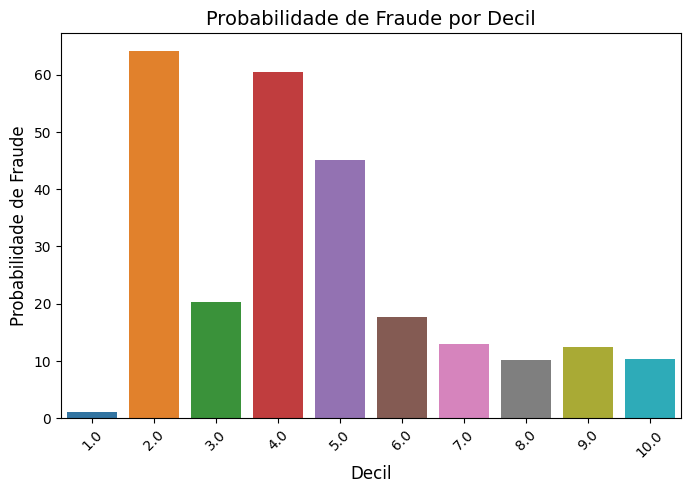

In [21]:
plt.figure(figsize=(8, 5))  # Ajusta o tamanho do gráfico

sns.barplot(x='Val_max_recebido_trans_token_ERC20_decis', y='Flag_1_Percentual', data=df_decis_p1_resumo)

# Alterar nomes dos eixos
plt.xlabel("Decil", fontsize=12)  # Nome do eixo X
plt.ylabel("Probabilidade de Fraude", fontsize=12)  # Nome do eixo Y

plt.title("Probabilidade de Fraude por Decil", fontsize=14)  # Adicionar título
plt.xticks(rotation=45)  # Rotacionar eixo X se necessário

plt.show()

In [22]:
print(df_decis_p1_resumo.columns)


Index(['Val_max_recebido_trans_token_ERC20_decis', 'Total_Registros',
       'Total_Registros_Flag_1', 'Flag_1_Percentual', 'Min_Valor',
       'Max_Valor'],
      dtype='object')


Após realizar a divisão dos valores atribuídos à variável Val_max_recebido_trans_token_ERC20 (valor máximo, em ethers, recebido em transferências de Token ERC20), obteve-se que os 2º e 4º decis são os que contam com a maior porcentagem de transações fraudulentas. Assim, concluí-se que carteiras que receberam valores máximos entre [0.7, 1.3] e [2.2, 13.3] ethers, possuem as maiores probabilidades de estarem relacionadas a uma fraude. 

Uma possível interpretação para estas informações é de que os fraudadores preferem realizar um maior volume de transações e transferir valores mais baixos. Isto pode ser constatado considerando que os decis 2º e 4º contabilizam, respectivamente, os 1º e 2º maiores números de transações em comparação aos demais.

In [23]:
for col in df_geral_num_main.select_dtypes(include = 'number').columns:
    col_index = df_geral_num_main.columns.get_loc(col) # Obtém o índice da coluna original.
    
    # Verifica se a coluna já existe e a remove, se necessário.
    if f'{col}_decis' in df_geral_num_main.columns:
        df_geral_num_main.drop(columns = [f'{col}_decis'], inplace = True)
    
    # Aplica qcut apenas nas linhas onde 'Val_min_recebido_trans_token_ERC20' != 0.
    df_geral_num_main.insert(col_index + 1, f'{col}_decis', 
                             pd.qcut(df_geral_num_main[df_geral_num_main['Val_min_recebido_trans_token_ERC20'] != 0][col], 
                                     q = 10, labels = False, duplicates = 'drop') + 1)

## Val_min_recebido_trans_token_ERC20 

In [24]:
# Cria um novo DataFrame apenas com as colunas de interesse de df_geral_num_main.
df_decis_p2 = df_geral_num_main[['Endereco', 'FLAG', 'Val_min_recebido_trans_token_ERC20', 'Val_min_recebido_trans_token_ERC20_decis']]

df_decis_p2.head()

,Endereco,FLAG,Val_min_recebido_trans_token_ERC20,Val_min_recebido_trans_token_ERC20_decis
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,0.0,NaN
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,0.0,NaN
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,0.0,NaN
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,0.0,NaN
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,0.0,NaN


In [25]:
df_decis_p2_resumo = df_decis_p2.groupby('Val_min_recebido_trans_token_ERC20_decis').agg(
    Total_Registros = ('FLAG', 'count'),
    Total_Registros_Flag_1 = ('FLAG', 'sum'),
    Flag_1_Percentual = ('FLAG', 'mean'), # Como 'FLAG' é 0 ou 1, a média já representa a proporção.
    Min_Valor = ('Val_min_recebido_trans_token_ERC20', 'min'), # Menor valor no decil
    Max_Valor = ('Val_min_recebido_trans_token_ERC20', 'max')  # Maior valor no decil
).reset_index()  # Transforma o índice de volta em coluna

# Converte a porcentagem corretamente.
df_decis_p2_resumo['Flag_1_Percentual'] *= 100

# Exibe o dataframe de resumo.
df_decis_p2_resumo.head(10)

,Val_min_recebido_trans_token_ERC20_decis,Total_Registros,Total_Registros_Flag_1,Flag_1_Percentual,Min_Valor,Max_Valor
0,1.0,228,3,1.315789,0.000001,0.105912
1,2.0,227,2,0.881057,0.105930,0.311355
2,3.0,227,2,0.881057,0.315926,0.557063
3,4.0,227,3,1.321586,0.557415,0.991302
4,5.0,516,432,83.72093,0.991672,1.337000
5,6.0,165,37,22.424242,1.357875,3.888216
6,7.0,400,335,83.75,3.902313,13.370000
7,8.0,54,19,35.185185,14.000000,61.788520
8,9.0,227,75,33.039648,64.214616,990000.000000


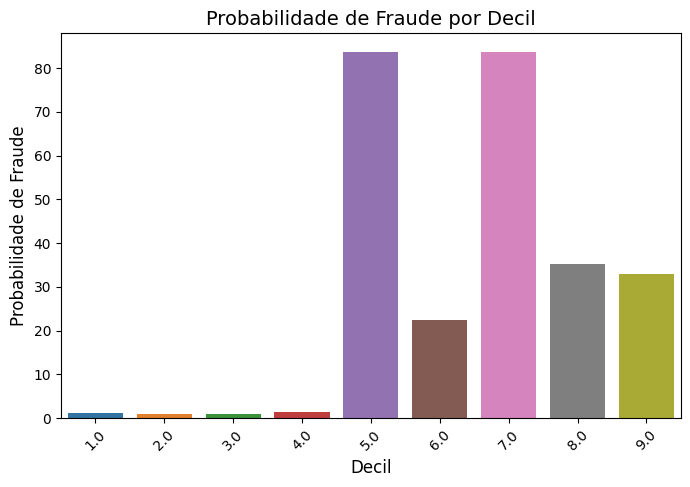

In [26]:
plt.figure(figsize=(8, 5))  # Ajusta o tamanho do gráfico

sns.barplot(x='Val_min_recebido_trans_token_ERC20_decis', y='Flag_1_Percentual', data=df_decis_p2_resumo)

# Alterar nomes dos eixos
plt.xlabel("Decil", fontsize=12)  # Nome do eixo X
plt.ylabel("Probabilidade de Fraude", fontsize=12)  # Nome do eixo Y

plt.title("Probabilidade de Fraude por Decil", fontsize=14)  # Adicionar título
plt.xticks(rotation=45)  # Rotacionar eixo X se necessário

plt.show()

Conforme a tabela acima indica, o as carteiras que recebederam os valores mínimos presentes nos 5º e 7º decis são as que possuem maior chance de terem relação com uma transação fraudulenta. Ou seja, carteiras que receberam valores mínimos entre [0.9, 1.3] e [3.9, 13.3] ethers, possuem maior probabilidade de serem fraudulentas.

Isso indica que, apesar de ser uma estratégia dos fraudadores transferir valores baixos, entre os valores mínimos recebidos pelos endereços, os ligados à fraude não são os mais baixos. 

In [27]:
for col in df_geral_num_main.select_dtypes(include = 'number').columns:
    col_index = df_geral_num_main.columns.get_loc(col) # Obtém o índice da coluna original.
    
    # Verifica se a coluna já existe e a remove, se necessário.
    if f'{col}_decis' in df_geral_num_main.columns:
        df_geral_num_main.drop(columns = [f'{col}_decis'], inplace=True)
    
    # Aplica qcut apenas nas linhas onde 'Val_min_recebido_trans_token_ERC20' != 0.
    df_geral_num_main.insert(col_index + 1, f'{col}_decis', 
                             pd.qcut(df_geral_num_main[df_geral_num_main['Total_ether_recebido_trans_token_ERC20_'] != 0][col], 
                                     q = 10, labels = False, duplicates = 'drop') + 1)

## Total_ether_recebido_trans_token_ERC20_

In [28]:
# Cria um novo DataFrame apenas com as colunas de interesse de df_geral_num_main.
df_decis_p3 = df_geral_num_main[['Endereco', 'FLAG', 'Total_ether_recebido_trans_token_ERC20_',	'Total_ether_recebido_trans_token_ERC20__decis']]

df_decis_p3.head()

,Endereco,FLAG,Total_ether_recebido_trans_token_ERC20_,Total_ether_recebido_trans_token_ERC20__decis
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,3.558854e+07,10.0
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,4.034283e+02,6.0
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,5.215121e+02,7.0
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,1.711105e+04,8.0
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,1.628297e+05,9.0


In [29]:
df_decis_p3_resumo = df_decis_p3.groupby('Total_ether_recebido_trans_token_ERC20__decis').agg(
    Total_Registros = ('FLAG', 'count'),
    Total_Registros_Flag_1 = ('FLAG', 'sum'),
    Flag_1_Percentual = ('FLAG', 'mean'), # Como 'FLAG' é 0 ou 1, a média já representa a proporção.
    Min_Valor = ('Total_ether_recebido_trans_token_ERC20_', 'min'), # Menor valor no decil.
    Max_Valor = ('Total_ether_recebido_trans_token_ERC20_', 'max')  # Maior valor no decil.
).reset_index()  # Transforma o índice de volta em coluna

# Converte a porcentagem corretamente.
df_decis_p3_resumo['Flag_1_Percentual'] *= 100

# Exibe o dataframe de resumo.
df_decis_p3_resumo.head(10)

,Total_ether_recebido_trans_token_ERC20__decis,Total_Registros,Total_Registros_Flag_1,Flag_1_Percentual,Min_Valor,Max_Valor
0,1.0,457,59,12.910284,1.000000e-18,6.766385e-01
1,2.0,696,452,64.942529,6.770380e-01,1.337000e+00
2,3.0,217,24,11.059908,1.337000e+00,2.164882e+00
3,4.0,687,377,54.876274,2.167795e+00,1.337000e+01
4,5.0,253,77,30.434783,1.337000e+01,1.000000e+02
5,6.0,429,134,31.235431,1.000000e+02,4.800859e+02
6,7.0,456,64,14.035088,4.828597e+02,1.963896e+03
7,8.0,457,49,10.722101,1.969000e+03,2.134890e+04
8,9.0,456,49,10.745614,2.135840e+04,3.941581e+05
9,10.0,457,45,9.846827,3.952977e+05,1.000020e+12


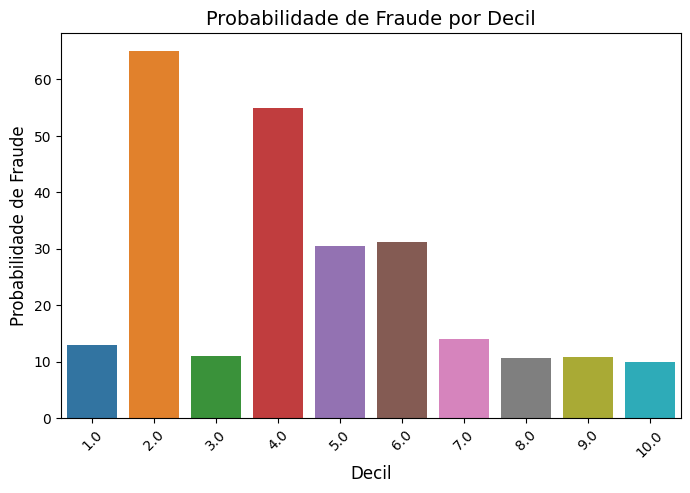

In [30]:
plt.figure(figsize=(8, 5))  # Ajusta o tamanho do gráfico

sns.barplot(x='Total_ether_recebido_trans_token_ERC20__decis', y='Flag_1_Percentual', data=df_decis_p3_resumo)

# Alterar nomes dos eixos
plt.xlabel("Decil", fontsize=12)  # Nome do eixo X
plt.ylabel("Probabilidade de Fraude", fontsize=12)  # Nome do eixo Y

plt.title("Probabilidade de Fraude por Decil", fontsize=14)  # Adicionar título
plt.xticks(rotation=45)  # Rotacionar eixo X se necessário

plt.show()

Quanto a variável Total_ether_recebido_trans_token_ERC20_, que, por sua vez, representa a quantia total de ethers recebida por uma conta, concluí-se que apresenta resultados bastante semelhantes a da variável Val_max_recebido_trans_token_ERC20. Os endereços cujos valores totais são abrangidos pelos 2º e 4º decis, [0.6, 1.3] e [2.2, 13.3] ethers, possuem maior chance de estarem ligados a transações fraudulentes. 

Assim, após observar os resultados para as três variáveis mais importantes na definição de fraude, concluí-se que a estratégia dos fraudadores é, em linhas gerais, realizar uma grande quantidade de transações transferindo valores baixos, como demonstra os dados obtidos para as variáveis Val_max_recebido_trans_token_ERC20_decis e Total_ether_recebido_trans_token_ERC20__decis. No entanto, em ocasiões que envolvam o reconhecimento de carteiras fraudulentas, é importante ter em vista que, entre os valores mínimos recebidos, as transações ligadas à fraude não tendem a envolver os menores valores dentre eles, assumindo quantias medianas de ethers.

# Somatória dos valores de ether recebidos e enviados de carteiras fraudulentas e não fraudulentas.

In [31]:
df_geral_tnti = df_geral_num_main.groupby('FLAG').agg(
    Quantidade_ether_enviado = ('Total_ether_enviado', 'sum'),
    Quantidade_ether_recebido = ('Total_ether_recebido', 'sum')
).reset_index() # Calcula a soma de valores de eteher agrupada por 'FLAG' = 1 ou 0.

df_geral_tnti.head()

,FLAG,Quantidade_ether_enviado,Quantidade_ether_recebido
0,0,9.978867e+07,1.143072e+08
1,1,1.903866e+05,2.111336e+05


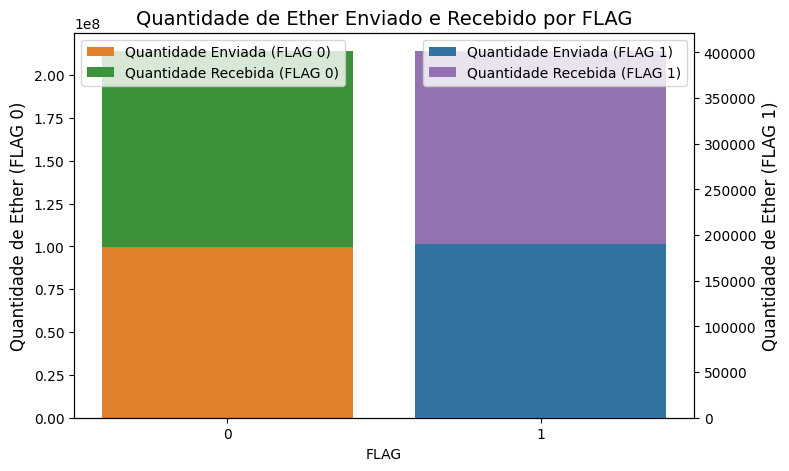

In [37]:
# Criar a figura e os eixos
fig, ax1 = plt.subplots(figsize=(8, 5))

# Gráfico para FLAG 0
ax1.bar(df_geral_tnti[df_geral_tnti['FLAG'] == 0]['FLAG'], 
        df_geral_tnti[df_geral_tnti['FLAG'] == 0]['Quantidade_ether_enviado'],
        label='Quantidade Enviada (FLAG 0)', color='#e1812c')
ax1.bar(df_geral_tnti[df_geral_tnti['FLAG'] == 0]['FLAG'], 
        df_geral_tnti[df_geral_tnti['FLAG'] == 0]['Quantidade_ether_recebido'],
        bottom=df_geral_tnti[df_geral_tnti['FLAG'] == 0]['Quantidade_ether_enviado'],
        label='Quantidade Recebida (FLAG 0)', color='#3a923a')

# Criar o segundo eixo Y para FLAG 1
ax2 = ax1.twinx()

# Gráfico para FLAG 1
ax2.bar(df_geral_tnti[df_geral_tnti['FLAG'] == 1]['FLAG'], 
        df_geral_tnti[df_geral_tnti['FLAG'] == 1]['Quantidade_ether_enviado'],
        label='Quantidade Enviada (FLAG 1)', color='#3274a1')
ax2.bar(df_geral_tnti[df_geral_tnti['FLAG'] == 1]['FLAG'], 
        df_geral_tnti[df_geral_tnti['FLAG'] == 1]['Quantidade_ether_recebido'],
        bottom=df_geral_tnti[df_geral_tnti['FLAG'] == 1]['Quantidade_ether_enviado'],
        label='Quantidade Recebida (FLAG 1)', color='#9372b2')

# Configuração dos eixos
ax1.set_xlabel("FLAG")
ax1.set_ylabel("Quantidade de Ether (FLAG 0)", fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2.set_ylabel("Quantidade de Ether (FLAG 1)", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Ajustar o eixo X para mostrar apenas 0 e 1
ax1.set_xticks([0, 1])  # Define as posições do eixo X para 0 e 1

# Adicionar título e legendas
plt.title("Quantidade de Ether Enviado e Recebido por FLAG", fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Exibir o gráfico
plt.show()

Após realizar o agrupamento necessário, observa-se que as maiores somas, tanto para os valores enviados, quanto para os recebidos, são as relacionadas a transações feitas por carteiras não fraudulentas. Isso indica que as transações fraudulentas, mesmo que tendam a ter um volume maior, como parte da estratégia dos fraudadores, ainda são responsáveis pela transferência de quantias totais bem inferiores as das transações legais, pois transferem, individualmente, valores baixos. 

#  Probabilidade de fraude em transações via endereço ou contrato.

Entre transações com transferência de Tokens ERC20, há duas opções: as transações que partiram de endereço e que partiram de contratos.

Vale explicar, também, de forma concisa, que "endereços exclusivos" diz respeito aos endereços individuais de cada carteira existente no Ethereum, já "contrato exclusivo" refere-se a programas que ditam as regras de uma transação e que, neste caso, são únicos. 

In [33]:
total_soma = df_geral_num_main["N_trans_token_recebidas_end_exc"] + df_geral_num_main["N_trans_token_recebidas_end_contrato_exc"]
print(total_soma)

0       112.0
1        12.0
2        15.0
3        22.0
4        50.0
        ...  
9836      4.0
9837      2.0
9838     10.0
9839      NaN
9840     79.0
Length: 9823, dtype: float64


In [34]:
df_geral_mainfraude = df_geral_num_main.groupby('FLAG').agg(
    N_transacoes_rec_end_exc = ('N_trans_token_recebidas_end_exc', 'sum'),
    N_transacoes_rec_contrato_exc = ('N_trans_token_recebidas_end_contrato_exc', 'sum')
).reset_index() # Calcula as somas agrupando por 'FLAG'.

# Calcula a soma total dos dois valores (considerando todas as FLAGS).
total_soma_endexc = df_geral_mainfraude.loc[df_geral_mainfraude["FLAG"] == 1, "N_transacoes_rec_end_exc"].sum() + df_geral_mainfraude.loc[df_geral_mainfraude["FLAG"] == 0, "N_transacoes_rec_end_exc"].sum()
total_soma_contexc = df_geral_mainfraude.loc[df_geral_mainfraude["FLAG"] == 1, "N_transacoes_rec_contrato_exc"].sum() + df_geral_mainfraude.loc[df_geral_mainfraude["FLAG"] == 0, "N_transacoes_rec_contrato_exc"].sum()

# Cria as colunas de probabilidade.
df_geral_mainfraude["Perc_end_exc"] = (df_geral_mainfraude["N_transacoes_rec_end_exc"] / total_soma_endexc) * 100
df_geral_mainfraude["Perc_contrato_exc"] = (df_geral_mainfraude["N_transacoes_rec_contrato_exc"] / total_soma_contexc) * 100

df_geral_mainfraude.head()

,FLAG,N_transacoes_rec_end_exc,N_transacoes_rec_contrato_exc,Perc_end_exc,Perc_contrato_exc
0,0,62752.0,38480.0,91.749397,87.315634
1,1,5643.0,5590.0,8.250603,12.684366


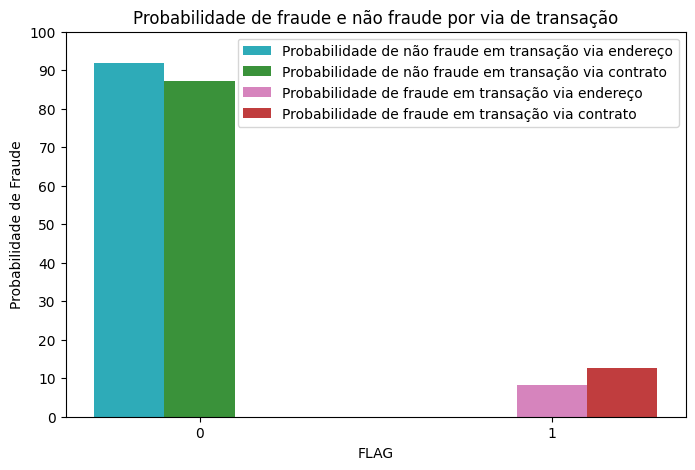

In [55]:
# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 5))

# Definir a largura das barras
bar_width = 0.2

# Definir as posições no eixo X
x = np.array([0, 1]) # FLAG 0 e FLAG 1

# Filtrar os dados
dados_flag0 = df_geral_mainfraude[df_geral_mainfraude['FLAG'] == 0]
dados_flag1 = df_geral_mainfraude[df_geral_mainfraude['FLAG'] == 1]

# Criar deslocamentos para cada barra
x0_enviada = x[0] - bar_width   # FLAG 0 - Probabilidade de não fraude em transação via endereço
x0_recebida = x[0]              # FLAG 0 - Probabilidade de não fraude em transação via contrato
x1_enviada = x[1]               # FLAG 1 - Probabilidade de fraude em transação via endereço
x1_recebida = x[1] + bar_width  # FLAG 1 - Probabilidade de fraude em transação via contrato

# Plotar as barras separadamente para FLAG 0 e FLAG 1
ax.bar(x0_enviada, dados_flag0['Perc_end_exc'], width=bar_width, label='Probabilidade de não fraude em transação via endereço', color='#2eabb8')
ax.bar(x0_recebida, dados_flag0['Perc_contrato_exc'], width=bar_width, label='Probabilidade de não fraude em transação via contrato', color='#3a923a')
ax.bar(x1_enviada, dados_flag1['Perc_end_exc'], width=bar_width, label='Probabilidade de fraude em transação via endereço', color='#d684bd')
ax.bar(x1_recebida, dados_flag1['Perc_contrato_exc'], width=bar_width, label='Probabilidade de fraude em transação via contrato', color='#c03d3e')

# Configuração dos eixos
ax.set_xlabel("FLAG")
ax.set_ylabel("Probabilidade de Fraude")

# Ajustar os rótulos do eixo X
ax.set_xticks(x)
ax.set_xticklabels(["0", "1"])

# 🔹 Ajustar o eixo Y para contar de 10 em 10
max_y = max(dados_flag0[['Perc_end_exc', 'Perc_contrato_exc']].max().max(),
            dados_flag1[['Perc_end_exc', 'Perc_contrato_exc']].max().max())

ax.set_yticks(np.arange(0, max_y + 10, 10))  # Define os intervalos de 10 em 10

# Adicionar título e legendas
plt.title("Probabilidade de fraude e não fraude por via de transação")
ax.legend(loc='upper right')

# Exibir o gráfico
plt.show()

De acordo com os resultados obtidos, em comparação, há 91,7% de probabilidade de que carteiras que receberam transações  de endereços não sejam partes de uma fraude, e, 8,2%, de que sejam. Já, quanto as carteiras que receberam transações originadas de um contratos, a probabilidade de que não sejam fraudulentas é de 87,3% e, a de que sejam, é de 12,6%. Assim, constatá-se que, em comparação, as carteiras cujas transações recebidas foram via contrato tem cerca de 50% mais chance de serem fraudulentas do que as via endereço.

# Probabilidade de fraude de acordo com o número de tokens exclusivos.

In [56]:
for col in df_geral_num_main.select_dtypes(include = 'number').columns:
    col_index = df_geral_num_main.columns.get_loc(col)  # Obtém o índice da coluna original.
    
    # Verifica se a coluna já existe e a remove, se necessário.
    if f'{col}_decis' in df_geral_num_main.columns:
        df_geral_num_main.drop(columns = [f'{col}_decis'], inplace = True)
    
    # Aplica qcut apenas nas linhas onde 'Val_min_recebido_trans_token_ERC20' != 0.
    df_geral_num_main.insert(col_index + 1, f'{col}_decis', 
                             pd.qcut(df_geral_num_main[df_geral_num_main['N_tokens_exc_recebidos_trans_ERC20'] != 0][col], 
                                     q = 10, labels = False, duplicates = 'drop') + 1)

In [57]:
# Cria um novo DataFrame apenas com as colunas de interesse de df_geral_num_main.
df_decis_tokenexc = df_geral_num_main[['Endereco', 'FLAG', 'N_tokens_exc_recebidos_trans_ERC20', 'N_tokens_exc_recebidos_trans_ERC20_decis']]

df_decis_tokenexc.head()

,Endereco,FLAG,N_tokens_exc_recebidos_trans_ERC20,N_tokens_exc_recebidos_trans_ERC20_decis
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,57.0,6.0
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,7.0,4.0
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,8.0,4.0
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,11.0,4.0
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,27.0,6.0


In [58]:
# Agrupa por decil e calculando as estatísticas.
df_tokenexc_resumo = df_decis_tokenexc.groupby('N_tokens_exc_recebidos_trans_ERC20_decis').agg(
    Total_Registros = ('N_tokens_exc_recebidos_trans_ERC20', 'count'),
    Total_Registros_Flag_1 = ('FLAG', 'sum'),
    Min_Valoro = ('N_tokens_exc_recebidos_trans_ERC20', 'min'),
    Max_Valor = ('N_tokens_exc_recebidos_trans_ERC20', 'max')
).reset_index()

# Calcula perc_flag_1 após o agrupamento.
df_tokenexc_resumo['Flag_1_Percentual'] = (df_tokenexc_resumo['Total_Registros_Flag_1'] / df_tokenexc_resumo['Total_Registros']) * 100

df_tokenexc_resumo.head(10)

,N_tokens_exc_recebidos_trans_ERC20_decis,Total_Registros,Total_Registros_Flag_1,Min_Valoro,Max_Valor,Flag_1_Percentual
0,1.0,2391,1047,1.0,2.0,43.78921
1,2.0,567,145,3.0,4.0,25.573192
2,3.0,299,42,5.0,6.0,14.046823
3,4.0,417,25,7.0,11.0,5.995204
4,5.0,437,15,12.0,25.0,3.432494
5,6.0,455,56,26.0,737.0,12.307692


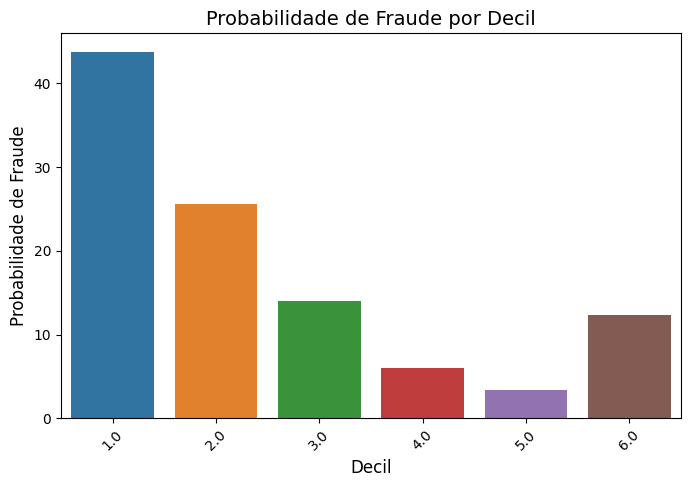

In [59]:
plt.figure(figsize=(8, 5))  # Ajusta o tamanho do gráfico

sns.barplot(x='N_tokens_exc_recebidos_trans_ERC20_decis', y='Flag_1_Percentual', data=df_tokenexc_resumo)

# Alterar nomes dos eixos
plt.xlabel("Decil", fontsize=12)  # Nome do eixo X
plt.ylabel("Probabilidade de Fraude", fontsize=12)  # Nome do eixo Y

plt.title("Probabilidade de Fraude por Decil", fontsize=14)  # Adicionar título
plt.xticks(rotation=45)  # Rotacionar eixo X se necessário

plt.show()

As carteiras que receberam transações com 1 ou 2 tokens exclusivos, de acordo com os resultos acima, apresentam a maior probabilidade de serem parte de uma fraude, com 43,8% de chance. Isso indica que, no momento da transferência, os fraudadores, preferem enviar valores utilizando poucas modalidades de tokens ERC20 e não diversificar. 

# Probabilidade de fraude de acordo com os intervalos médios de tempo entre transações.


In [60]:
for col in df_geral_num_main.select_dtypes(include = 'number').columns:
    col_index = df_geral_num_main.columns.get_loc(col) # Obtém o índice da coluna original.
    
    # Verifica se a coluna já existe e a remove, se necessário.
    if f'{col}_decis' in df_geral_num_main.columns:
        df_geral_num_main.drop(columns = [f'{col}_decis'], inplace = True)
    
    # Aplica qcut apenas nas linhas onde 'Val_min_recebido_trans_token_ERC20' != 0.
    df_geral_num_main.insert(col_index + 1, f'{col}_decis', 
                             pd.qcut(df_geral_num_main[df_geral_num_main['Tempo_med_entre_trans_enviadas'] != 0][col], 
                                     q = 10, labels = False, duplicates = 'drop') + 1)

In [61]:
df_decis_tempmed = df_geral_num_main[['Endereco', 'FLAG', 'Tempo_med_entre_trans_enviadas', 'Tempo_med_entre_trans_enviadas_decis']]

df_decis_tempmed.head()

,Endereco,FLAG,Tempo_med_entre_trans_enviadas,Tempo_med_entre_trans_enviadas_decis
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,7.0
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,9.0
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,10.0
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,9.0
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,4.0


In [62]:
# Agrupa por decil e calculando as estatísticas.
df_tempmed_resumo = df_decis_tempmed.groupby('Tempo_med_entre_trans_enviadas_decis').agg(
    Total_Registros = ('Tempo_med_entre_trans_enviadas', 'count'),
    Total_Registros_Flag_1 = ('FLAG', 'sum'),
    Min_Valor = ('Tempo_med_entre_trans_enviadas', 'min'),
    Max_Valor = ('Tempo_med_entre_trans_enviadas', 'max')
).reset_index()

# Calcula perc_flag_1 após o agrupamento.
df_tempmed_resumo['Flag_1_Percentual'] = (df_tempmed_resumo['Total_Registros_Flag_1'] / df_tempmed_resumo['Total_Registros']) * 100

df_tempmed_resumo.head(10)

,Tempo_med_entre_trans_enviadas_decis,Total_Registros,Total_Registros_Flag_1,Min_Valor,Max_Valor,Flag_1_Percentual
0,1.0,634,8,0.28,4.09,1.26183
1,2.0,628,21,4.10,14.78,3.343949
2,3.0,630,7,14.79,23.71,1.111111
3,4.0,631,28,23.73,102.28,4.437401
4,5.0,634,25,102.52,162.16,3.943218
5,6.0,627,107,162.17,483.85,17.065391
6,7.0,630,180,484.97,2036.64,28.571429
7,8.0,631,137,2038.93,5868.31,21.711569
8,9.0,630,115,5922.71,18445.13,18.253968
9,10.0,631,102,18457.47,430287.67,16.164818


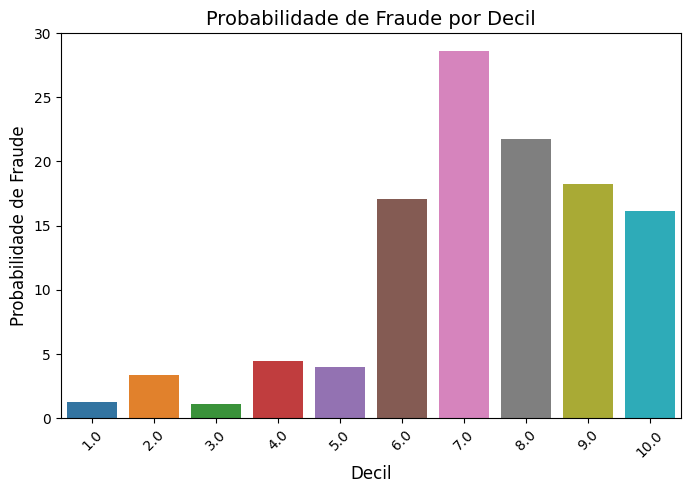

In [63]:
plt.figure(figsize=(8, 5))  # Ajusta o tamanho do gráfico

sns.barplot(x='Tempo_med_entre_trans_enviadas_decis', y='Flag_1_Percentual', data=df_tempmed_resumo)

# Alterar nomes dos eixos
plt.xlabel("Decil", fontsize=12)  # Nome do eixo X
plt.ylabel("Probabilidade de Fraude", fontsize=12)  # Nome do eixo Y

plt.title("Probabilidade de Fraude por Decil", fontsize=14)  # Adicionar título
plt.xticks(rotation=45)  # Rotacionar eixo X se necessário

plt.show()

Após fazer a divisão das observações em decis, obteve-se que as carteiras com intervalos médios de tempo inter transações entre [484.9, 2036,6] minutos, respectivamente, entre 8 horas e 32 horas, são as com maior probabilidade de serem fraudulentas. 